---------
# CMSE 831 - Project


---------
### 1. Import Data

In [19]:
import pandas as pd

# Load the provided data
file_path = 'final_df.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,Edge_ID,Start_Node_ID,End_Node_ID,L2_Distance,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude
0,0,0,1,0.002025,-121.904167,41.974556,-121.902153,41.974766
1,1,0,6,0.005952,-121.904167,41.974556,-121.910088,41.973942
2,2,1,2,0.014350,-121.902153,41.974766,-121.896790,41.988075
3,3,2,3,0.012279,-121.896790,41.988075,-121.889603,41.998032
4,4,3,4,0.011099,-121.889603,41.998032,-121.886681,42.008739


---------
### 2. Calcalate Capacity

In [20]:
# Assumptions for capacity calculation
average_vehicle_length = 5  # in meters (average length of a passenger car)
safe_following_distance = 2  # in seconds (common safe following distance)
average_speed = 13.9  # in m/s (50 km/h, a common urban road speed)

# Calculate the safe distance in meters (using the 2-second rule)
safe_distance_meters = average_speed * safe_following_distance

# Total space occupied by one car (vehicle length + safe following distance)
total_space_per_car = average_vehicle_length + safe_distance_meters

# Adding an additional column for capacity estimation in the dataframe
df['Road_Capacity'] = df['L2_Distance'] / total_space_per_car

# Display the first few rows of the dataframe with the new column
df.head()


,Edge_ID,Start_Node_ID,End_Node_ID,L2_Distance,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Road_Capacity
0,0,0,1,0.002025,-121.904167,41.974556,-121.902153,41.974766,0.000062
1,1,0,6,0.005952,-121.904167,41.974556,-121.910088,41.973942,0.000181
2,2,1,2,0.014350,-121.902153,41.974766,-121.896790,41.988075,0.000438
3,3,2,3,0.012279,-121.896790,41.988075,-121.889603,41.998032,0.000374
4,4,3,4,0.011099,-121.889603,41.998032,-121.886681,42.008739,0.000338



I have calculated an estimated road capacity for each edge in your data. This estimate is based on the following assumptions:

1. Average Vehicle Length: 5 meters (typical length for a passenger car).
2. Safe Following Distance: 2 seconds, which is a common guideline for safety.
3. Average Speed: 13.9 m/s (equivalent to 50 km/h), a typical speed for urban roads.

The capacity is estimated by dividing the L2 distance of each road segment by the total space occupied by one car (which includes the length of the car and the safe following distance). This gives us an estimate of how many cars can fit on that segment of the road under ideal conditions.

---------
### 3. Create a subset of data

Data is too big to handle, so trim the data with reasonable size.


In [26]:
node_filter = 1000 # Change the number

In [27]:
df['Start_Node_ID'] = pd.to_numeric(df['Start_Node_ID'])
df['End_Node_ID'] = pd.to_numeric(df['End_Node_ID'])

df = df[(df['Start_Node_ID'] <= node_filter) & (df['End_Node_ID'] <= node_filter)]

In [28]:
df

,Edge_ID,Start_Node_ID,End_Node_ID,L2_Distance,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Road_Capacity
0,0,0,1,0.002025,-121.904167,41.974556,-121.902153,41.974766,0.000062
1,1,0,6,0.005952,-121.904167,41.974556,-121.910088,41.973942,0.000181
2,2,1,2,0.014350,-121.902153,41.974766,-121.896790,41.988075,0.000438
3,3,2,3,0.012279,-121.896790,41.988075,-121.889603,41.998032,0.000374
4,4,3,4,0.011099,-121.889603,41.998032,-121.886681,42.008739,0.000338
...,...,...,...,...,...,...,...,...,...
1020,1020,995,996,0.009900,-122.632050,41.423717,-122.630211,41.433445,0.000302
1021,1021,996,997,0.018930,-122.630211,41.433445,-122.634956,41.451771,0.000577
1022,1022,997,998,0.008459,-122.634956,41.451771,-122.632683,41.459919,0.000258
1023,1023,998,999,0.012701,-122.632683,41.459919,-122.623070,41.468220,0.000387


---------
### 4. Plot the original flow

In [29]:
import networkx as nx
G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(row['Start_Node_ID'], row['End_Node_ID'], capacity=row['Road_Capacity'])

### 4.1. Graph with location info

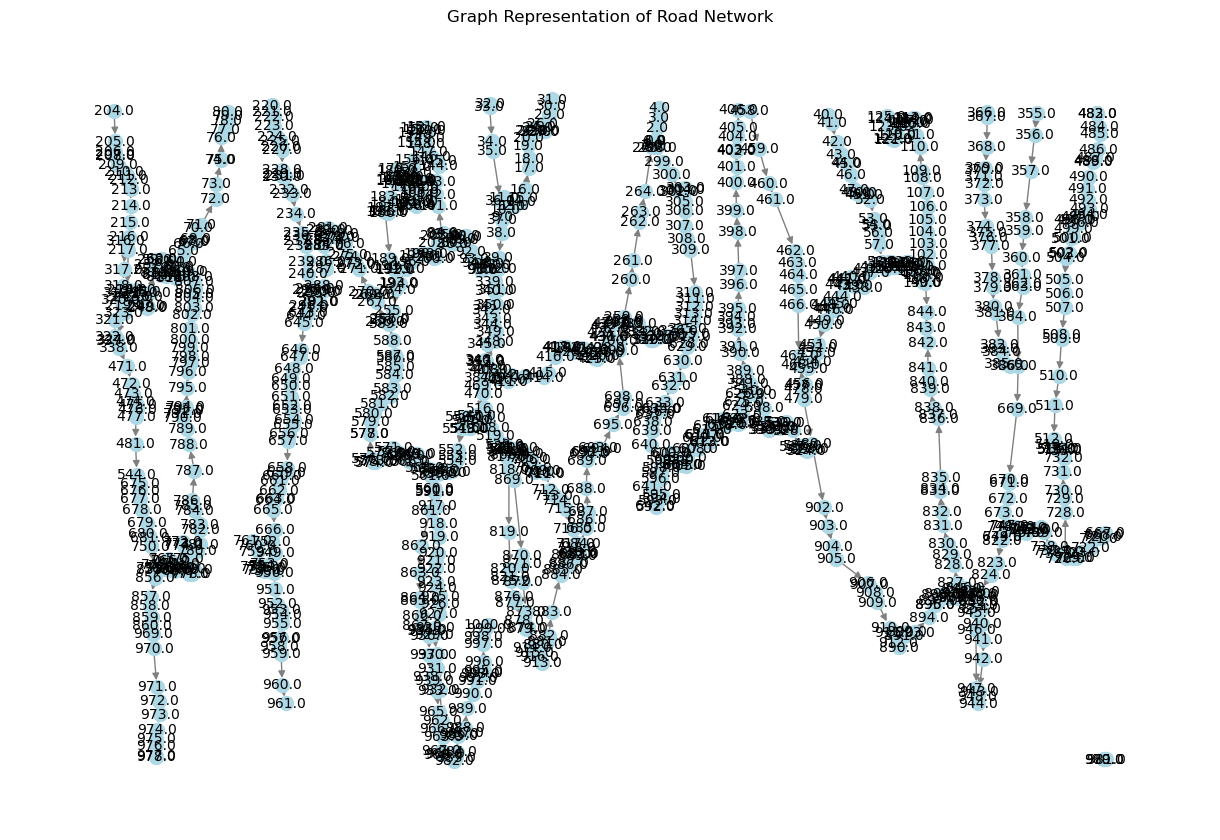

In [30]:
import matplotlib.pyplot as plt

# Revising the provided code to fix the location of nodes using longitude and latitude

# Recreating the graph with the revised road capacity values
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['Start_Node_ID'], row['End_Node_ID'], capacity=row['Road_Capacity'])

# Creating a dictionary to map node IDs to their corresponding longitude and latitude
node_positions = {}
for _, row in df.iterrows():
    node_positions[row['Start_Node_ID']] = (row['Start_Longitude'], row['Start_Latitude'])
    node_positions[row['End_Node_ID']] = (row['End_Longitude'], row['End_Latitude'])

# Plotting the graph with fixed positions based on longitude and latitude
plt.figure(figsize=(12, 8))
nx.draw(G, pos=node_positions, with_labels=True, node_color='lightblue', node_size=100, edge_color='gray', font_size=10)
plt.title("Graph Representation of Road Network")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


### 4.2. Graph without location info

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


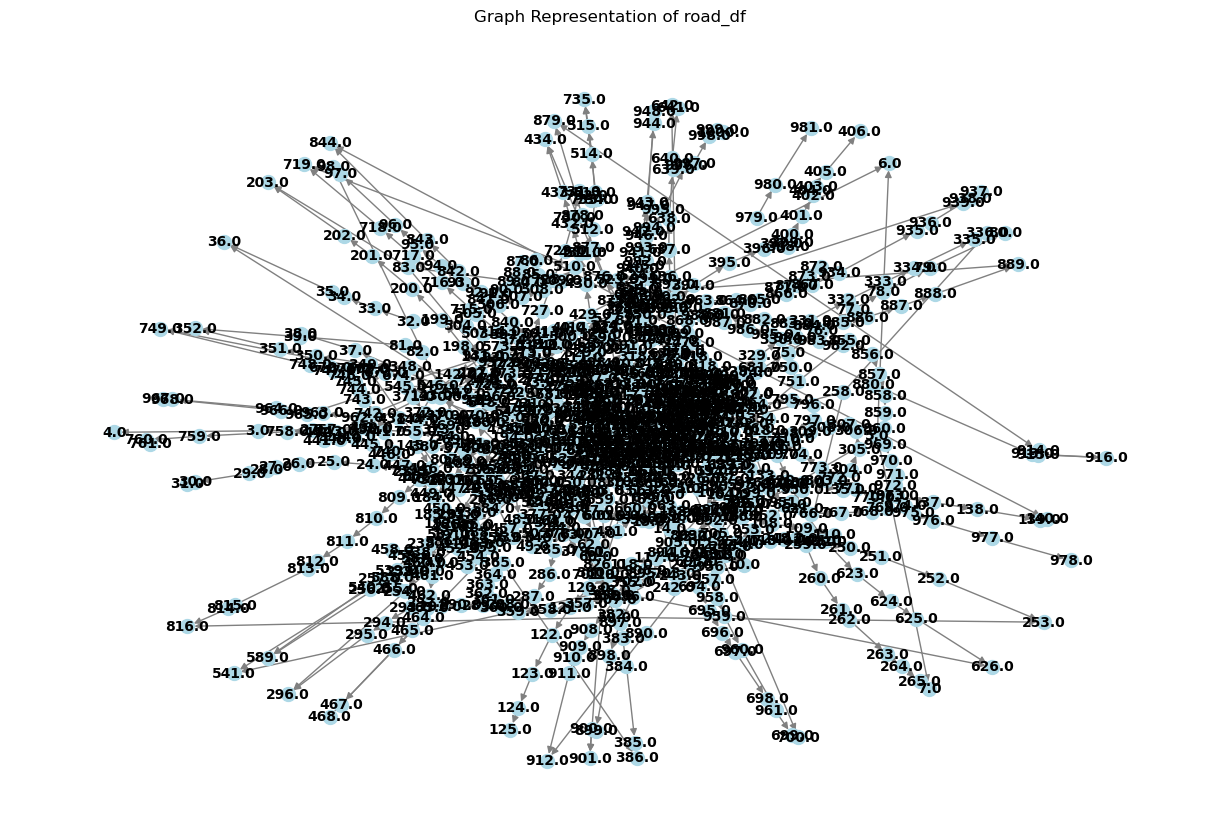

In [31]:
# Probably before applying maximum flow???

# Plotting the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=100, edge_color='gray', font_size=10, font_weight='bold')
plt.title("Graph Representation of road_df")
plt.show()

---------
### 5. Set the Source and Sink

In [40]:
source = 835
sink = 842

flow_value, flow_dict = nx.maximum_flow(G, source, sink)

---------
### 6. Result after applying maximum flow

### 6.1. Graph with location info

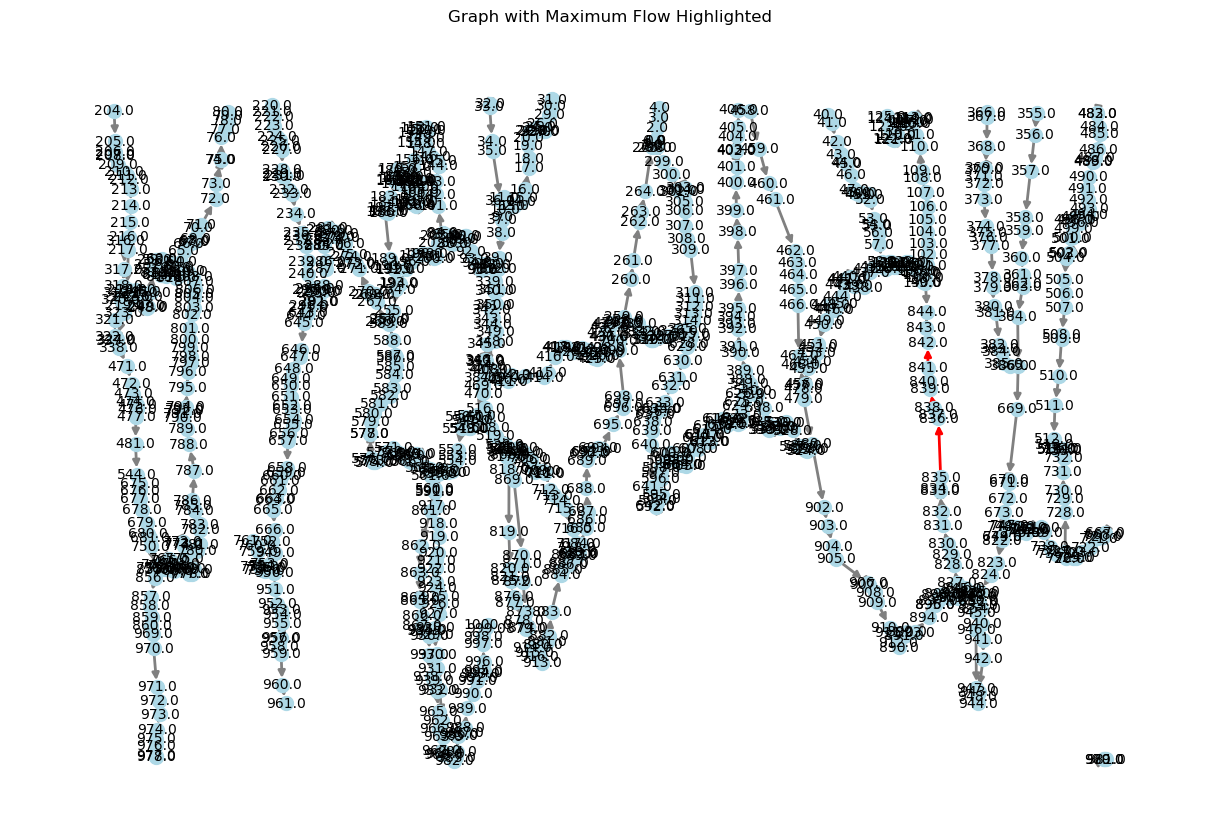

In [41]:
# Assuming that the variable 'flow_dict' contains the flow information for each edge
# Since 'flow_dict' is not provided, this part of the code is hypothetical

# Creating a color map based on the flow
edge_colors = []
for u, v in G.edges():
    flow = flow_dict[u][v]  # Retrieve actual flow data
    if flow > 0:
        edge_colors.append('red')  # Flow is present
    else:
        edge_colors.append('gray')  # No flow

# Plotting the graph with fixed positions based on longitude and latitude
plt.figure(figsize=(12, 8))
nx.draw(G, pos=node_positions, with_labels=True, edge_color=edge_colors, width=2, 
        node_color='lightblue', node_size=100, font_size=10)
plt.title("Graph with Maximum Flow Highlighted")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


### 6.2. Graph without location info

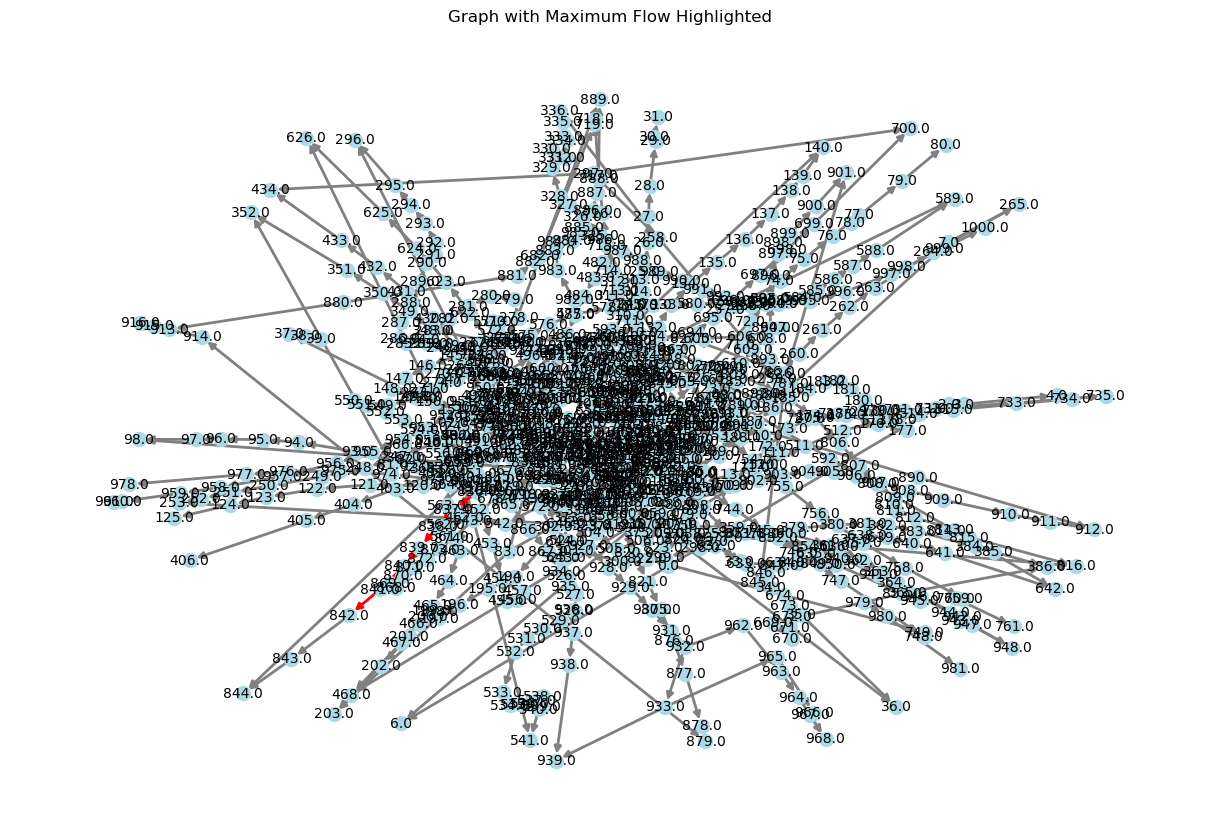

In [42]:
# Probably after applying maximum flow???

# Create a color map based on the flow
edge_colors = []
for u, v in G.edges():
    flow = flow_dict[u][v]
    if flow > 0:
        edge_colors.append('red')  # Flow is present
    else:
        edge_colors.append('gray') # No flow

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, edge_color=edge_colors, width=2, 
        node_color='lightblue', node_size=100, font_size=10)
plt.title("Graph with Maximum Flow Highlighted")
plt.show()


# In this plot, edges where flow occurs are colored red, and other edges are black.
# This will help you visualize the path of the maximum flow from the source to the sink in your graph.

In [43]:
print("Maximum flow value:", flow_value)
print("Flow along each path:", flow_dict)

Maximum flow value: 0.0001819207317073171
Flow along each path: {0.0: {1.0: 0, 6.0: 0}, 1.0: {2.0: 0}, 6.0: {}, 2.0: {3.0: 0}, 3.0: {4.0: 0}, 4.0: {}, 5.0: {6.0: 0, 7.0: 0, 8.0: 0}, 7.0: {265.0: 0}, 8.0: {298.0: 0}, 265.0: {}, 298.0: {299.0: 0}, 9.0: {10.0: 0, 36.0: 0, 37.0: 0}, 10.0: {11.0: 0}, 36.0: {}, 37.0: {38.0: 0}, 11.0: {12.0: 0}, 12.0: {13.0: 0}, 13.0: {14.0: 0}, 14.0: {15.0: 0}, 15.0: {16.0: 0}, 16.0: {17.0: 0}, 17.0: {18.0: 0}, 18.0: {19.0: 0}, 19.0: {20.0: 0}, 20.0: {21.0: 0}, 21.0: {22.0: 0}, 22.0: {23.0: 0}, 23.0: {24.0: 0}, 24.0: {25.0: 0}, 25.0: {26.0: 0}, 26.0: {27.0: 0}, 27.0: {28.0: 0}, 28.0: {29.0: 0}, 29.0: {30.0: 0}, 30.0: {31.0: 0}, 31.0: {}, 32.0: {33.0: 0}, 33.0: {34.0: 0}, 34.0: {35.0: 0}, 35.0: {36.0: 0}, 38.0: {39.0: 0}, 39.0: {81.0: 0, 352.0: 0}, 81.0: {82.0: 0}, 352.0: {}, 40.0: {41.0: 0}, 41.0: {42.0: 0}, 42.0: {43.0: 0}, 43.0: {44.0: 0}, 44.0: {45.0: 0}, 45.0: {46.0: 0}, 46.0: {47.0: 0}, 47.0: {48.0: 0}, 48.0: {49.0: 0}, 49.0: {50.0: 0}, 50.0: {51.0: 0},

In [44]:
import csv

file_path = 'flow_data.csv'

with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Path', 'Flow'])
    for path, flow in flow_dict.items():
        writer.writerow([path, flow])
    writer.writerow(['Total Flow', flow_value])